# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## 1. Import the important libraries and datas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm

pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.width', 10000)

In [2]:
leads= pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\Lead Scoring Assignment\leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking Shape
leads.shape

(9240, 37)

In [4]:
# Checking info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Checking summary
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Cleaning

We will be checking which columns are to be drop. Lets start by observing the Null Values.

In [6]:
# Checking Null Values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

First we will be taking down the columns which has Null values more than 3000.

In [7]:
# Dropping Null Values
for ncol in leads:
    if leads[ncol].isnull().sum() > 3000:
        leads.drop(ncol, 1, inplace=True)

In [8]:
# Checking the Null Values again
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Lets drop column City and Country as it doesn't hold much significance in the upcoming analysis.

In [9]:
leads.drop(['City','Country'], axis = 1, inplace = True)

Let's get value counts for all the columns.

In [10]:
for col in leads:
    print(leads[col].value_counts())
    print('___________________________________________________')

21aeda6a-dbc1-4398-9d9c-aefd7b1fd4bc    1
52c2c547-b017-4793-ac04-7345207acd4e    1
a739f33a-7d4d-4c4e-9c9c-3c30e1f48940    1
81d83bfc-95ef-458e-b6f6-6cc0e4c0a66c    1
cf54b78b-3b02-42c9-9f9e-69d6beea3f45    1
c5217e41-fb8c-40d6-84d9-52871502c1dc    1
3b087779-4ca3-4afd-9a16-822dd478fc94    1
7278f0c8-6a8e-4ab7-8a8e-9241482afd15    1
1ec43f39-c087-450a-9f9b-fb5a31f2bf2d    1
e8e9ad02-ca96-4813-8b1e-a74d37fd71fa    1
a7162628-da7b-4c9b-b9e8-4b2ea599dcc4    1
8d267b12-e306-4bb9-8c34-0e1de6dc1bd9    1
25f06e4f-6563-44e7-a246-dd3ed0428e5d    1
7ba1e51e-b1cd-4569-b03b-4afce0dce5f5    1
bb83f4ad-646f-49e8-bd8a-75a7cce69e49    1
2dac5325-f9c3-43f4-9387-d4e117857a0e    1
364920c5-3698-4882-9928-e51ede93c18c    1
d5073d50-2944-405e-872f-99023f4a0177    1
b32753ee-2ad9-43d2-98a5-d215d9f0dac2    1
98a678b6-3475-466c-8a2e-eab4e269c665    1
0b7ad8c2-7f1a-4c60-89d6-85ad7f7104f6    1
db9312a1-c65f-4a0c-a1e9-e82c65bb74b2    1
135a6d59-9a05-44d5-84d7-cb1c5829a4cd    1
abf49a4d-5af9-4a97-ba19-be04f6a049

Lead Profile, How did you hear about X Education and Specialization now have the level 'Select'. Let's check them once again.

In [11]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [12]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [13]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

As we can see that Lead Profile and How did you hear about X Education has so many empty values which is ' Select ' variable. So we will drop them.

In [14]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [15]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [16]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
# We will be dropping the column as it doesn't have dynamic data nor it will come handy in future analysis

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [18]:
# Check the number of null values again
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

What is your current occupation got 2690 null values but we will only be removing the rows as it will come handy in the further analysis. Also we will only be removing rows for the rest of the columns with null values in it.

In [19]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]
leads = leads[~pd.isnull(leads['TotalVisits'])]
leads = leads[~pd.isnull(leads['Lead Source'])]
leads = leads[~pd.isnull(leads['Specialization'])]

In [20]:
# Lets check if we have any Null values left again
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

All the Null values are dropped

In [21]:
# Lets have a look at the data again 
leads.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website
12,8bf76a52-2478-476b-8618-1688e07874ad,660562,API,Organic Search,No,1,11.0,1538,11.00,Email Opened,Marketing Management,Unemployed,No,Modified
13,88867067-3750-4753-8d33-1c7d1db53b5e,660558,Landing Page Submission,Organic Search,No,0,5.0,170,5.00,Email Opened,Business Administration,Unemployed,Yes,Email Opened


It seems like we have no use for the columns Prospect ID and Lead Number. Lets drop them

In [22]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [23]:
# Lets have a look again
leads.head(20)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website
12,API,Organic Search,No,1,11.0,1538,11.00,Email Opened,Marketing Management,Unemployed,No,Modified
13,Landing Page Submission,Organic Search,No,0,5.0,170,5.00,Email Opened,Business Administration,Unemployed,Yes,Email Opened


Data is ready to undergo the analysis.

## 2. Exploratory Data Analysis

### 2.1 Numerical columns

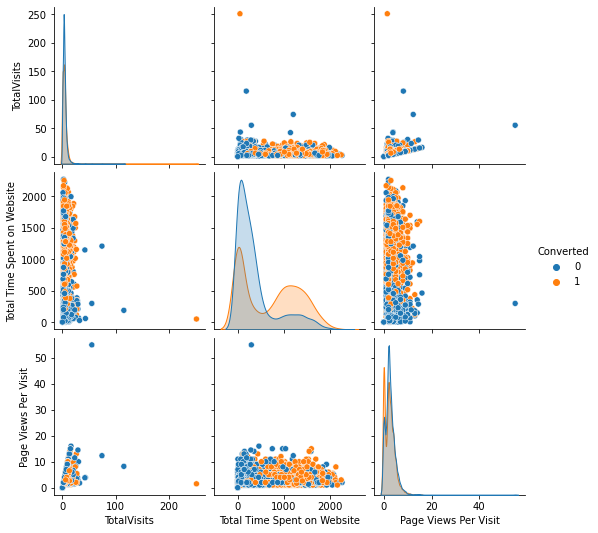

In [24]:
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

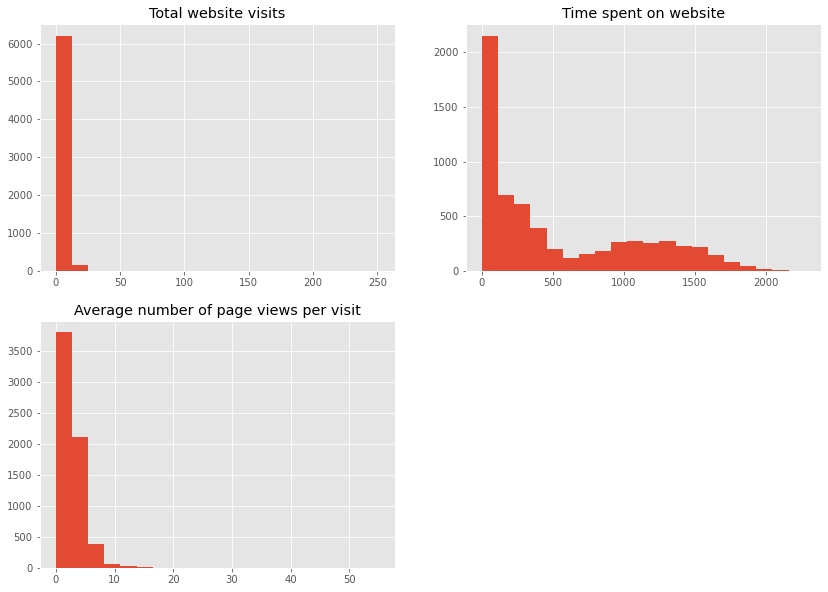

In [25]:
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(leads.TotalVisits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(leads['Total Time Spent on Website'], bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Average number of page views per visit')

plt.show()

High peaks and skewed data. There might be a possibility of outliers. We will check them next

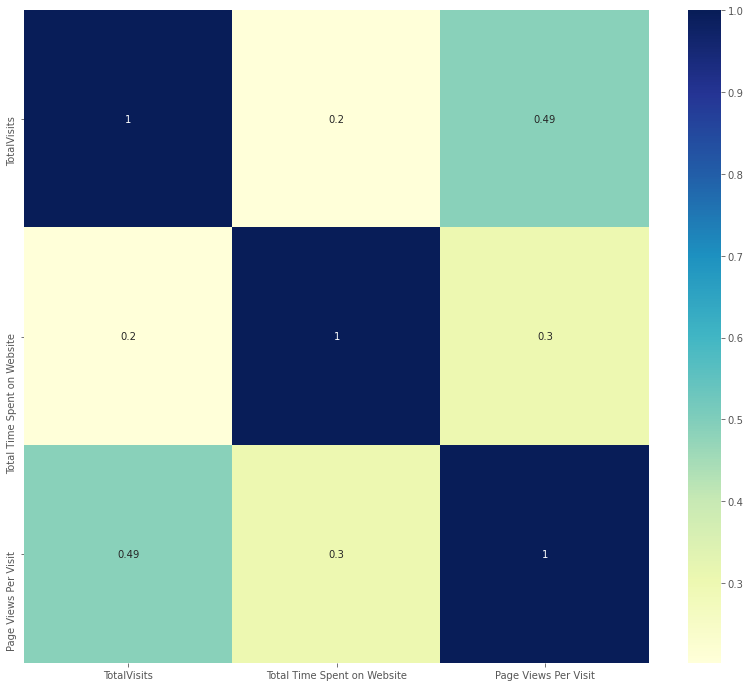

In [26]:
plt.figure(figsize = (14,12))
sns.heatmap(leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

No significaqnt correlation such that columns can be dropped

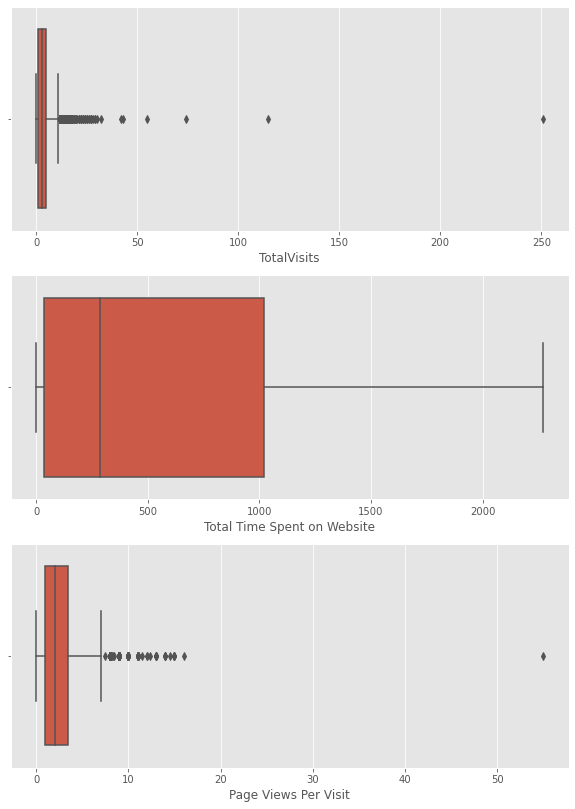

In [27]:
# Check for outliers
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(leads.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(leads['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

Looking at both the box plots and the statistics, there are upper bound outliers in both TotalVisits and Page Views Per Visit columns. We can also see that the data can be capped at 99 percentile.

### 2.2 Categorical columns

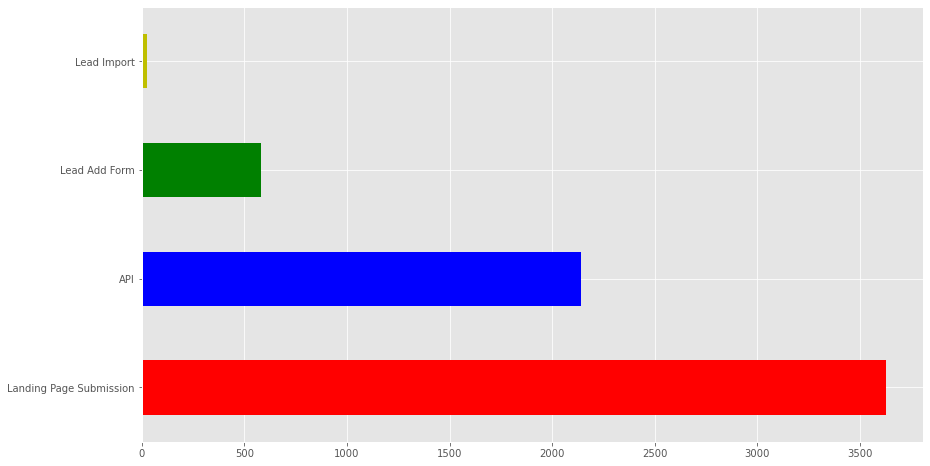

In [28]:
plt.figure(figsize = (14, 8))
leads['Lead Origin'].value_counts().plot.barh(color=['r','b','g','y'])
plt.show()

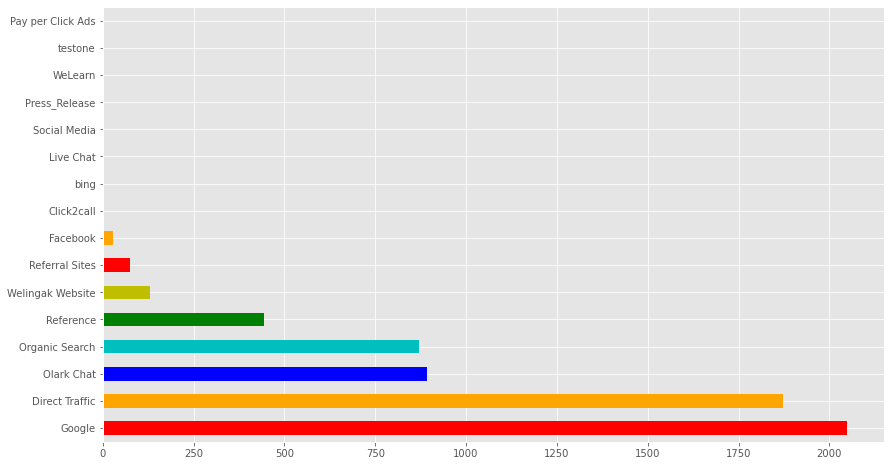

In [29]:
plt.figure(figsize = (14, 8))
leads['Lead Source'].value_counts().plot.barh(color=['r','orange','b','c','g','y'])
plt.show()

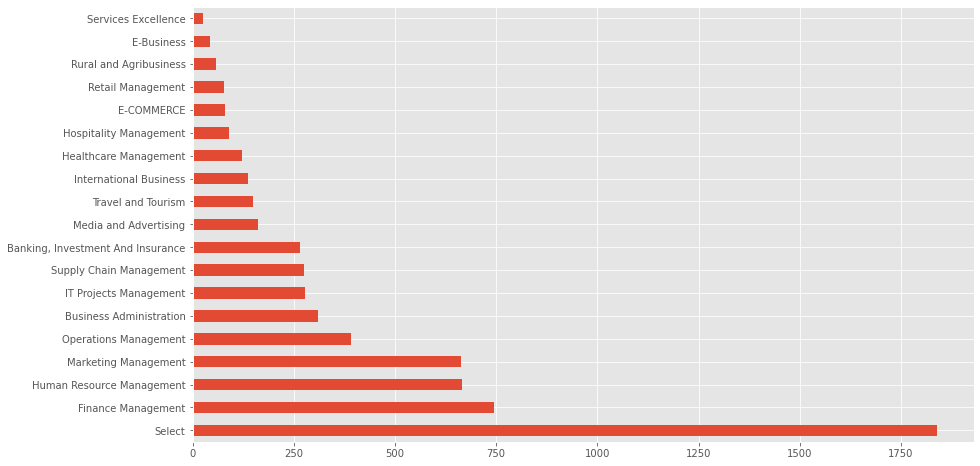

In [30]:
plt.figure(figsize = (14, 8))
leads['Specialization'].value_counts().plot.barh()
plt.show()

It seems like majority of people haven't select any specialization.

## 3. Dummy Variable Creation

In [31]:
#getting a list of categorical columns
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [32]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [33]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation']], drop_first=True)
leads = pd.concat([leads,dummy],1)

In [34]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
leads = pd.concat([leads, dummy], axis = 1)

In [35]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
leads = pd.concat([leads, dummy], axis = 1)

In [36]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
leads = pd.concat([leads, dummy], axis = 1)

In [37]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
leads = pd.concat([leads, dummy], axis = 1)

In [38]:
#dropping the original columns after dummy variable creation
leads.drop(cat_cols,1,inplace = True)

In [39]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## 4. Train-Test Split & Logistic Regression Model Building

In [40]:
# Putting response variable to y
y = leads['Converted']
y.head()
X=leads.drop('Converted', axis=1)

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4461 entries, 8003 to 8217
Data columns (total 76 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4461 non-null   float64
 1   Total Time Spent on Website                           4461 non-null   int64  
 2   Page Views Per Visit                                  4461 non-null   float64
 3   Lead Origin_Landing Page Submission                   4461 non-null   uint8  
 4   Lead Origin_Lead Add Form                             4461 non-null   uint8  
 5   Lead Origin_Lead Import                               4461 non-null   uint8  
 6   What is your current occupation_Housewife             4461 non-null   uint8  
 7   What is your current occupation_Other                 4461 non-null   uint8  
 8   What is your current occupation_Student               4

In [43]:
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.064874,-0.824395,-0.223652,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
218,0.064874,-0.611929,0.753710,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4171,0.431907,-0.804919,1.731071,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4037,-0.669191,-0.943022,-1.201013,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3660,-0.669191,-0.943022,-1.201013,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 5. Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

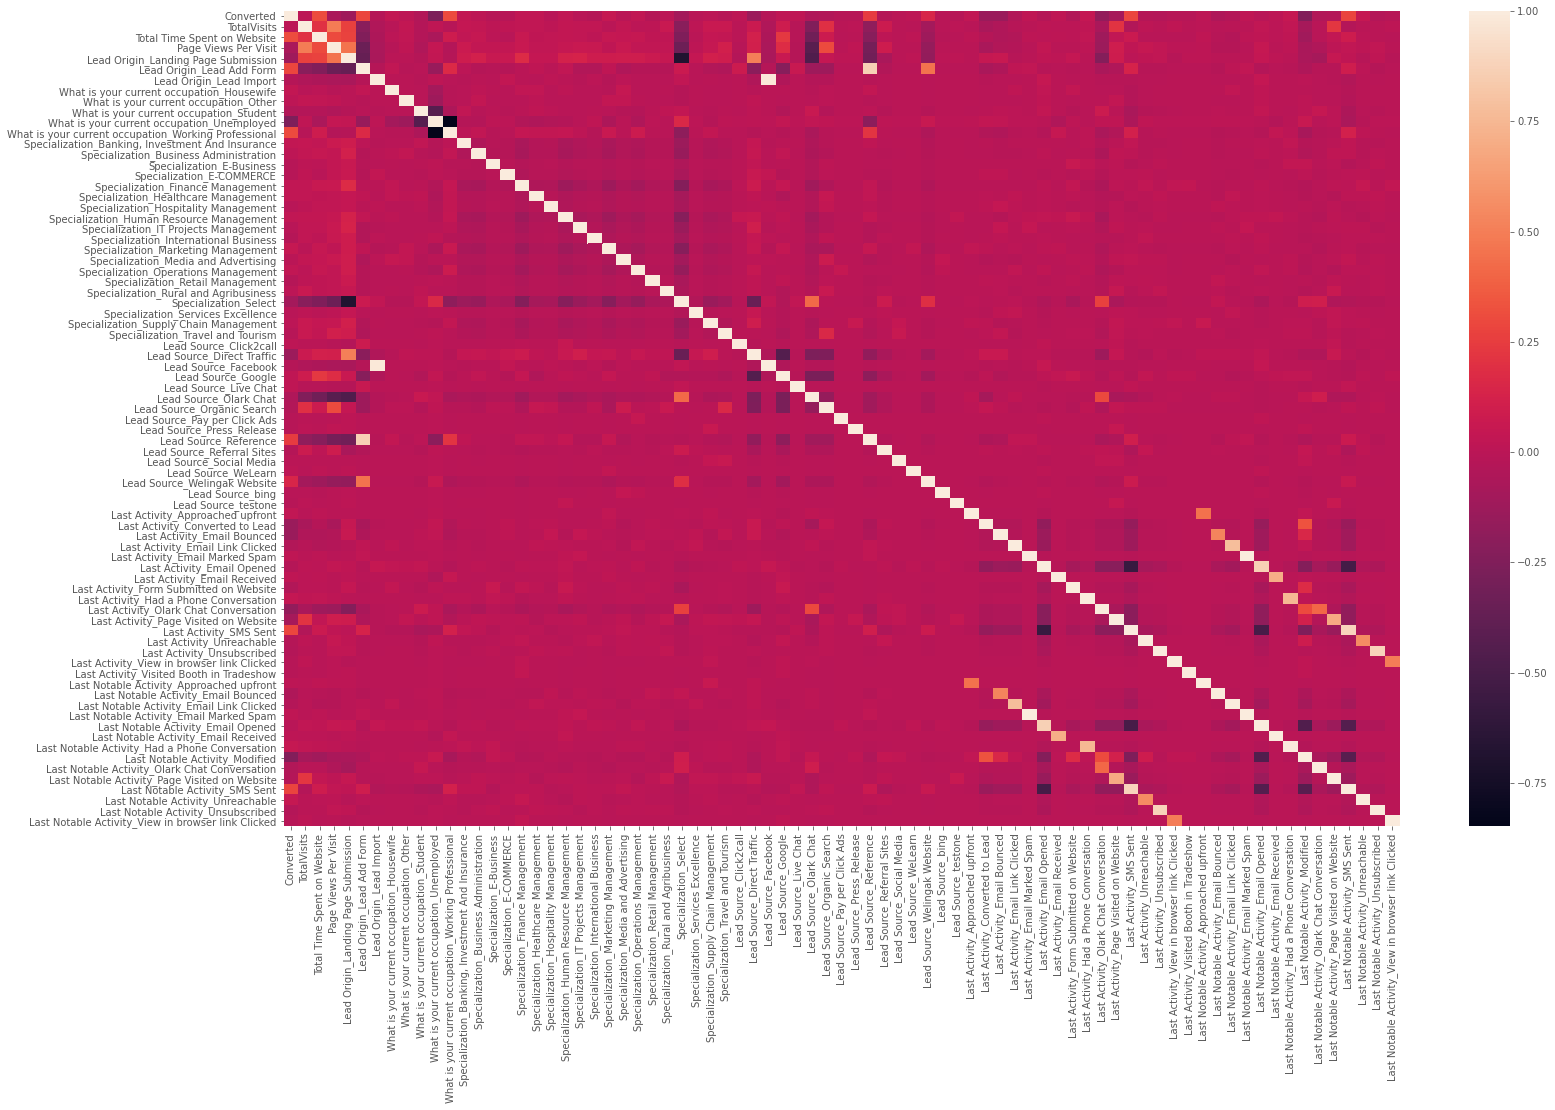

In [44]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

## 6. Model Building using Stats Model & RFE

In [45]:
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [46]:
rfe.support_

array([False,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False])

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 52),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 11),
 ('Specialization_Business Administration', False, 55),
 ('Specialization_E-Business', False, 37),
 ('Specialization_E-COMMERCE', False, 29),
 ('Specialization_Finance Management', False, 47),
 ('Specialization_Healthcare Management', False, 39),
 ('Specialization_Hospitality Management', False, 7),
 ('Specialization_Human Resource Management', False, 54),
 ('Specialization_IT Projects Managemen

In [48]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'What is your current occupation_Housewife', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Specialization_Select', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Unreachable'], dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import', 'What is your current occupation_Other', 'Specialization_Banking, Investment And Insurance', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'Lead Source_Click2call', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per

In [50]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.9
Date:                Mon, 06 Dec 2021   Deviance:                       4139.8
Time:                        02:32:47   Pearson chi2:                 4.99e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0549      0.605      1.745      0.081      -0.130       2.240
Total Time Spent on Website                              1.0921      0.046     23.778      0.000       1.002       1.182
Lead Origin_Landing Page Submission                     -0.9905      0.136     -7.265      0.000      -1.258      -0.723
Lead Origin_Lead Add Form                                3.4528      0.266     12.976      0.000       2.931       3.974
What is your current occupation_Housewife               22.6721   2.39e+04      0.001      0.999   -4.68e+04    4.68e+04
What is your current occupation_Student                 -1.0664      0.635     -1.678      0.093      -2.312       0.179
What is your current occupation_Unemployed              -1.2500      0.599     -2.087      0.037      -2.424      -0.076
What is your current occupation_Working Professional     1.2238      0.628      1.949      0.051      -0.007       2.455
Specialization_Select                                   -1.0185      0.134     -7.588      0.000      -1.282      -0.755
Lead Source_Olark Chat                                   1.1515      0.135      8.500      0.000       0.886       1.417
Lead Source_Welingak Website                             2.6403      1.039      2.542      0.011       0.604       4.676
Last Activity_Email Bounced                             -1.6914      0.371     -4.557      0.000      -2.419      -0.964
Last Activity_Had a Phone Conversation                   1.1933      0.980      1.218      0.223      -0.727       3.114
Last Activity_SMS Sent                                   1.1268      0.082     13.707      0.000       0.966       1.288
Last Notable Activity_Had a Phone Conversation          23.1228   2.07e+04      0.001      0.999   -4.05e+04    4.06e+04
Last Notable Activity_Unreachable                        2.7018      0.809      3.342      0.001       1.117       4.287
========================================================================================================================
"""

There are quite a few variables with p-value higher than 0.05. We will be dropping them.

In [51]:
#dropping columns with high p-value
col = col.drop('What is your current occupation_Housewife',1)
col = col.drop('What is your current occupation_Student',1)
col = col.drop('Last Activity_Had a Phone Conversation',1)
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)
col = col.drop('What is your current occupation_Working Professional',1)

In [52]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2118.7
Date:                Mon, 06 Dec 2021   Deviance:                       4237.3
Time:                        02:32:47   Pearson chi2:                 4.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.4565      0.168      8.676      0.000       1.127       1.785
Total Time Spent on Website                    1.0877      0.045     23.964      0.000       0.999       1.177
Lead Origin_Landing Page Submission           -1.0367      0.134     -7.726      0.000      -1.300      -0.774
Lead Origin_Lead Add Form                      3.4376      0.265     12.967      0.000       2.918       3.957
What is your current occupation_Unemployed    -1.5804      0.129    -12.260      0.000      -1.833      -1.328
Specialization_Select                         -1.1070      0.132     -8.356      0.000      -1.367      -0.847
Lead Source_Olark Chat                         1.0753      0.134      8.008      0.000       0.812       1.338
Lead Source_Welingak Website                   2.6523      1.039      2.553      0.011       0.616       4.688
Last Activity_Email Bounced                   -1.6471      0.358     -4.604      0.000      -2.348      -0.946
Last Activity_SMS Sent                         1.1494      0.081     14.146      0.000       0.990       1.309
Last Notable Activity_Unreachable              2.7098      0.805      3.367      0.001       1.132       4.287
==============================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,5.34
1,Lead Origin_Landing Page Submission,3.78
4,Specialization_Select,2.62
5,Lead Source_Olark Chat,1.62
2,Lead Origin_Lead Add Form,1.60
8,Last Activity_SMS Sent,1.54
6,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.24
7,Last Activity_Email Bounced,1.05
9,Last Notable Activity_Unreachable,1.01


There is a high correlation between two variables so we drop the variable with the higher valued VIF value

In [54]:
#dropping variable with high VIF

col = col.drop('What is your current occupation_Unemployed',1)

In [55]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4451
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2203.4
Date:                Mon, 06 Dec 2021   Deviance:                       4406.8
Time:                        02:32:48   Pearson chi2:                 4.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.1896      0.124      1.534      0.125      -0.053       0.432
Total Time Spent on Website             1.0987      0.045     24.577      0.000       1.011       1.186
Lead Origin_Landing Page Submission    -1.1433      0.131     -8.749      0.000      -1.399      -0.887
Lead Origin_Lead Add Form               3.5139      0.262     13.402      0.000       3.000       4.028
Specialization_Select                  -1.3457      0.130    -10.374      0.000      -1.600      -1.091
Lead Source_Olark Chat                  1.1337      0.133      8.555      0.000       0.874       1.393
Lead Source_Welingak Website            2.5206      1.038      2.428      0.015       0.486       4.556
Last Activity_Email Bounced            -1.6546      0.351     -4.709      0.000      -2.343      -0.966
Last Activity_SMS Sent                  1.1175      0.079     14.093      0.000       0.962       1.273
Last Notable Activity_Unreachable       2.6714      0.798      3.348      0.001       1.107       4.235
=======================================================================================================
"""

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Specialization_Select,1.61
4,Lead Source_Olark Chat,1.54
7,Last Activity_SMS Sent,1.54
2,Lead Origin_Lead Add Form,1.51
1,Lead Origin_Landing Page Submission,1.35
5,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.24
6,Last Activity_Email Bounced,1.05
8,Last Notable Activity_Unreachable,1.00


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [57]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.322553
218     0.164367
4171    0.137274
4037    0.257590
3660    0.977792
207     0.183055
2044    0.186867
6411    0.840104
6498    0.070796
2085    0.979006
dtype: float64

In [58]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32255271, 0.16436729, 0.13727364, 0.25758984, 0.97779215,
       0.18305527, 0.18686744, 0.84010373, 0.07079649, 0.9790055 ])

In [59]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.322553,8003
1,0,0.164367,218
2,1,0.137274,4171
3,1,0.257590,4037
4,1,0.977792,3660


In [60]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.322553,8003,0
1,0,0.164367,218,0
2,1,0.137274,4171,0
3,1,0.257590,4037,0
4,1,0.977792,3660,1


In [61]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1868  444]
 [ 570 1579]]


In [62]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7726967047747142


In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7347603536528617

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

0.8079584775086506

In [66]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.19204152249134948


In [67]:
# positive predictive value 
print (TP / float(TP+FP))

0.7805239742956006


In [68]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7662018047579984


## 7. PLOTTING ROC CURVE

In [69]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [70]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

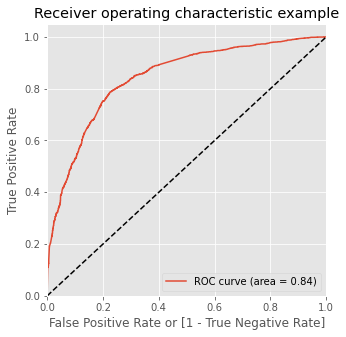

In [71]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.84 indicating a good predictive model.

## 8. Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.322553,8003,0,1,1,1,1,0,0,0,0,0,0
1,0,0.164367,218,0,1,1,0,0,0,0,0,0,0,0
2,1,0.137274,4171,0,1,1,0,0,0,0,0,0,0,0
3,1,0.257590,4037,0,1,1,1,0,0,0,0,0,0,0
4,1,0.977792,3660,1,1,1,1,1,1,1,1,1,1,1


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.505268  0.998604  0.046713
0.2   0.2  0.663753  0.946021  0.401384
0.3   0.3  0.750280  0.878548  0.631055
0.4   0.4  0.774266  0.806422  0.744377
0.5   0.5  0.772697  0.734760  0.807958
0.6   0.6  0.745573  0.608190  0.873270
0.7   0.7  0.718225  0.513727  0.908304
0.8   0.8  0.680341  0.389949  0.950260
0.9   0.9  0.625420  0.242904  0.980969


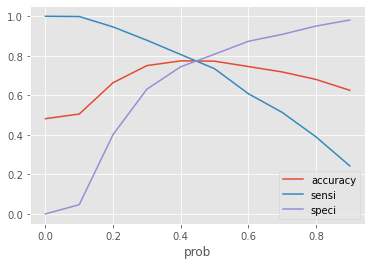

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.45 is the optimum point to take it as a cutoff probability.

In [75]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.322553,8003,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.164367,218,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.137274,4171,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.257590,4037,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.977792,3660,1,1,1,1,1,1,1,1,1,1,1,1


In [76]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.322553,8003,0,32
1,0,0.164367,218,0,16
2,1,0.137274,4171,0,14
3,1,0.257590,4037,0,26
4,1,0.977792,3660,1,98


In [77]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7785249943958754

In [78]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1811,  501],
       [ 487, 1662]], dtype=int64)

In [79]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7733829688227082

In [81]:
# Let us calculate specificity
TN / float(TN+FP)

0.7833044982698962

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.84, which is very good. We have the following values for the Train Data:

Accuracy : 77.85%

Sensitivity : 77.33% 

Specificity : 78.33% 

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [82]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2166955017301038


In [83]:
# Positive predictive value 
print (TP / float(TP+FP))

0.768377253814147


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7880765883376849


In [85]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[1811,  501],
       [ 487, 1662]], dtype=int64)

In [86]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.768377253814147

In [87]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7733829688227082

In [88]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.768377253814147

In [89]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7733829688227082

In [90]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

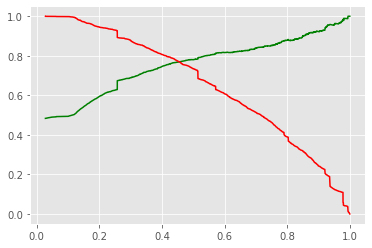

In [91]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [92]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4771,-0.902685,-0.955492,-1.044782,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6122,0.866207,-0.838993,1.841743,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9202,0.108111,0.716094,0.604661,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6570,-0.144588,0.564292,0.192300,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2668,1.118906,0.629602,0.604661,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [93]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Select,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_Unreachable
4771,-0.955492,0,1,0,0,0,0,1,0
6122,-0.838993,1,0,0,0,0,0,0,0
9202,0.716094,1,0,0,0,0,0,1,0
6570,0.564292,1,0,0,0,0,0,1,0
2668,0.629602,1,0,0,0,0,0,1,0


In [94]:
X_test_sm = sm.add_constant(X_test)

## 9. PREDICTIONS ON TEST SET

In [95]:
y_test_pred = res.predict(X_test_sm)

In [96]:
y_test_pred[:10]

4771    0.977493
6122    0.132900
9202    0.721206
6570    0.686470
2668    0.701703
4233    0.800735
3368    0.711138
9091    0.447294
5972    0.320746
3631    0.792851
dtype: float64

In [97]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [98]:
# Let's see the head
y_pred_1.head()

,0
4771,0.977493
6122,0.132900
9202,0.721206
6570,0.686470
2668,0.701703


In [99]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [100]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [101]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [102]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [103]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4771,0.977493
1,0,6122,0.132900
2,0,9202,0.721206
3,1,6570,0.686470
4,1,2668,0.701703


In [104]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [105]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4771,0.977493
1,0,6122,0.132900
2,0,9202,0.721206
3,1,6570,0.686470
4,1,2668,0.701703


In [106]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [107]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4771,1,0.977493,98
1,6122,0,0.132900,13
2,9202,0,0.721206,72
3,6570,1,0.686470,69
4,2668,1,0.701703,70


In [108]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.45 else 0)

In [109]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4771,1,0.977493,98,1
1,6122,0,0.132900,13,0
2,9202,0,0.721206,72,1
3,6570,1,0.686470,69,1
4,2668,1,0.701703,70,1


In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7651673640167364

In [111]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[772, 224],
       [225, 691]], dtype=int64)

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7543668122270742

In [114]:
# Let us calculate specificity
TN / float(TN+FP)

0.7751004016064257

In [115]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7551912568306011

In [116]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7543668122270742

After running the model on the Test Data these are the figures we obtain:

Accuracy : 76.52%

Sensitivity : 75.44%

Specificity : 77.51%


## Final Observation:

Let us compare the values obtained for Train & Test:

Train Data: 

Accuracy : 77.85%

Sensitivity : 77.33%

Specificity : 78.33%

Test Data: 

Accuracy : 76.52%

Sensitivity : 75.44%

Specificity : 77.51%

The Model seems to predict the Conversion Rate pretty decent and we should be able to give the CEO confidence in making pretty much of good calls based on this model.